## Observations and Insights 

In [199]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy as sp


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

pd.merge(mouse_metadata,study_results,how='left')

# Display the data table for preview
Mouse_merge_table = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')
Mouse_merge_tableDf = pd.DataFrame(Mouse_merge_table)
Mouse_merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [200]:
Mice = Mouse_merge_table['Mouse ID'].nunique()
Mice

249

In [201]:
Mouse_merge_table_dups = Mouse_merge_table[Mouse_merge_table[['Mouse ID','Timepoint']].duplicated()].sort_values('Mouse ID')
Mouse_merge_table_dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [202]:
# Optional: Get all the data for the duplicate mouse ID. 

Mouse_merge_table_dups


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [203]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Mouse_merge_table_Removedups = Mouse_merge_tableDf.loc[Mouse_merge_tableDf['Mouse ID']!='g989']
Mouse_merge_table_Removedups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [204]:
# Checking the number of mice in the clean DataFrame.
Mouse_merge_table_Removedups['Mouse ID'].nunique()


248

## Summary Statistics

In [205]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = Mouse_merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = Mouse_merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = Mouse_merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = Mouse_merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = Mouse_merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Standard Deviation': stdv, 'SEM':sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [206]:
# Using the aggregation method, produce the same summary statistics in a single line.
Mouse_merge_table.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

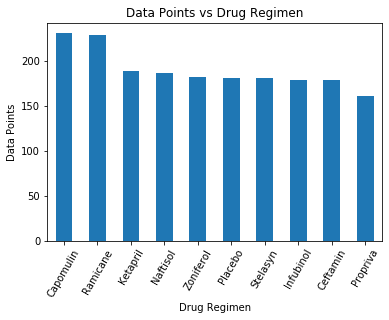

In [207]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
Data1 = Mouse_merge_table.copy()
Bar1 = Data1['Drug Regimen'].value_counts()

Data1 = Bar1.plot.bar(x= 'Drug Regimen', rot=60, title = 'Data Points vs Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Data Points')

Data1

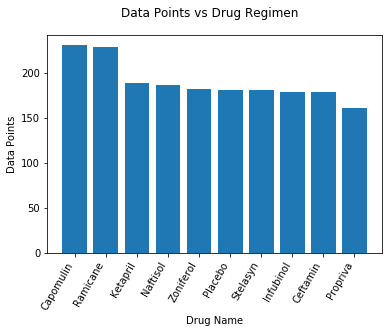

,Drug Name,counts
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182


In [208]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
Data1 = Mouse_merge_table.copy()
Bar2 = Data1 ['Drug Regimen'].value_counts().rename_axis('Drug Name').reset_index(name='counts')

plt.bar(Bar2['Drug Name'], Bar2['counts'])
plt.suptitle('Data Points vs Drug Regimen')
plt.setp(plt.gca().get_xticklabels(), rotation=60, horizontalalignment='right')
plt.ylabel('Data Points')
plt.xlabel('Drug Name')
plt.show()
Bar2.head()

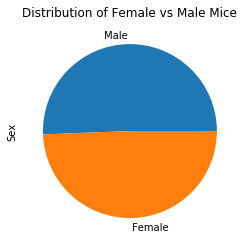

In [209]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Data2 = Data1['Sex'].value_counts()
Pie1 = Data2.plot.pie(title='Distribution of Female vs Male Mice')
Pie1


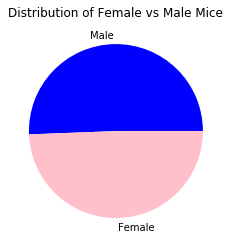

In [210]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Male', 'Female'
colors = ['blue', 'pink']
plt.pie(Data2, labels=labels, colors=colors)
plt.title('Distribution of Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [211]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(Mouse_merge_table.groupby('Mouse ID', as_index = 'false')['Timepoint'].max())

max_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Mouse_merged_df = pd.merge(Mouse_merge_table, max_timepoint, on=['Mouse ID','Timepoint'])
Mouse_merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [212]:
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']

for drug in drugs:
    tmp=Mouse_merge_table.loc[Mouse_merge_table['Drug Regimen']==drug,'Tumor Volume (mm3)']

    quartiles = tmp.quantile([.25,.5,.75])
    lower_bound = quartiles[0.25]
    upper_bound = quartiles[0.75]
    iqr = upper_bound - lower_bound

    upper_outlier = upper_bound + (1.5 * iqr)
    lower_outlier = lower_bound - (1.5 * iqr)
    outliers = tmp.loc[(tmp>upper_outlier) | (tmp<lower_outlier)]

    print(f"Outliers for {drug}: {outliers}")



Outliers for Capomulin: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ramicane: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Outliers for Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [213]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

tmp = df[df['Drug Regimen']==drug]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Vol_Data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
DataC = Mouse_merge_table.copy()
DataR = Mouse_merge_table.copy()
DataI = Mouse_merge_table.copy()
DataCe = Mouse_merge_table.copy()
Data = Mouse_merge_table.copy()

Capomulin = DataC.loc[Data['Drug Regimen'] == 'Capomulin']
Ramicane = DataR.loc[Data['Drug Regimen'] == 'Ramicane']
Infubinol = DataI.loc[Data['Drug Regimen'] == 'Infubinol']
Ceftamin = DataCe.loc[Data['Drug Regimen'] == 'Ceftamin']

iqrC = sp.stats,iqr(Capomulin['Tumor Volume (mm3)'])
iqrR = sp.stats,iqr(Ramicane['Tumor Volume (mm3)'])
iqrI = sp.stats,iqr(Infubinol['Tumor Volume (mm3)'])
iqrCe = sp.stats,iqr(Ceftamin['Tumor Volume (mm3)'])

DrugsDF2 = DrugsDF1 = {'Drug Regime': ['Capomulin','Ramicane','Infubinol','Ceftamin'], 'iqr': [iqrC, iqrR, iqrR, iqrI, iqrCe]}
DrugsDF2 = pd.DataFrame(data=DrugsDF1)
DrugsDF2.head()

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

NameError: name 'df' is not defined

In [180]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [181]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [182]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [183]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
